# GDP Growth Analysis (Basic Python Types)

這個 notebook 不使用 pandas，改用 Python 基本資料型態來處理資料：

1. 使用 `csv` 模組讀取 CSV 檔案
2. 把每一筆資料存成 `dict`，全部放在 `list` 裡
3. 用 `for` 迴圈把資料格式化輸出成表格樣式
4. 用 `matplotlib` 畫出各國近五年的 GDP 年增率折線圖


In [1]:
import csv
import matplotlib.pyplot as plt

%matplotlib inline


In [8]:
# 讀取 CSV 檔案，使用基本資料型態儲存
file_path = "gdp_growth_top10_plus_taiwan.csv"  # 確保這個檔案跟 notebook 放在同一個資料夾

data = []  # 這會是一個 list，裡面每一筆是 dict

with open(file_path, newline="", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)  # 讀掉標題列：['Country', 'Year', 'GDP_Growth']
    for row in reader:
        country = row[0]
        year = int(row[1])
        gdp_growth = float(row[2])
        record = {
            "country": country,
            "year": year,
            "gdp_growth": gdp_growth,
        }
        data.append(record)

print("資料筆數：", len(data))
print("前 5 筆資料：")
for record in data[:5]:
    print(record)

[{'country': 'United States', 'year': 2019, 'gdp_growth': 2.3}, {'country': 'United States', 'year': 2020, 'gdp_growth': -3.0}, {'country': 'United States', 'year': 2021, 'gdp_growth': 5.7}, {'country': 'United States', 'year': 2022, 'gdp_growth': 2.0}, {'country': 'United States', 'year': 2023, 'gdp_growth': 2.1}, {'country': 'China', 'year': 2019, 'gdp_growth': 6.0}, {'country': 'China', 'year': 2020, 'gdp_growth': 2.3}, {'country': 'China', 'year': 2021, 'gdp_growth': 8.1}, {'country': 'China', 'year': 2022, 'gdp_growth': 3.0}, {'country': 'China', 'year': 2023, 'gdp_growth': 5.0}, {'country': 'Japan', 'year': 2019, 'gdp_growth': 0.7}, {'country': 'Japan', 'year': 2020, 'gdp_growth': -4.5}, {'country': 'Japan', 'year': 2021, 'gdp_growth': 2.1}, {'country': 'Japan', 'year': 2022, 'gdp_growth': 1.0}, {'country': 'Japan', 'year': 2023, 'gdp_growth': 1.2}, {'country': 'Germany', 'year': 2019, 'gdp_growth': 0.6}, {'country': 'Germany', 'year': 2020, 'gdp_growth': -4.6}, {'country': 'Germ

In [3]:
# 以表格方式列印資料（簡單排版）

# 先印出標題列
print(f"{'Country':15} {'Year':>6} {'GDP_Growth':>12}")
print("-" * 35)

# 再逐列印出每一筆資料
for record in data:
    country = record["country"]
    year = record["year"]
    gdp_growth = record["gdp_growth"]
    print(f"{country:15} {year:6d} {gdp_growth:12.1f}")

Country           Year   GDP_Growth
-----------------------------------
United States     2019          2.3
United States     2020         -3.0
United States     2021          5.7
United States     2022          2.0
United States     2023          2.1
China             2019          6.0
China             2020          2.3
China             2021          8.1
China             2022          3.0
China             2023          5.0
Japan             2019          0.7
Japan             2020         -4.5
Japan             2021          2.1
Japan             2022          1.0
Japan             2023          1.2
Germany           2019          0.6
Germany           2020         -4.6
Germany           2021          2.7
Germany           2022          1.8
Germany           2023          0.5
India             2019          4.0
India             2020         -6.0
India             2021          8.5
India             2022          7.0
India             2023          6.5
United Kingdom    2019      

In [4]:
# 準備畫圖：先找出有哪些國家
countries = sorted(set(record["country"] for record in data))
print("國家數量：", len(countries))
print("國家列表：", countries)

國家數量： 11
國家列表： ['Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'South Korea', 'Taiwan', 'United Kingdom', 'United States']


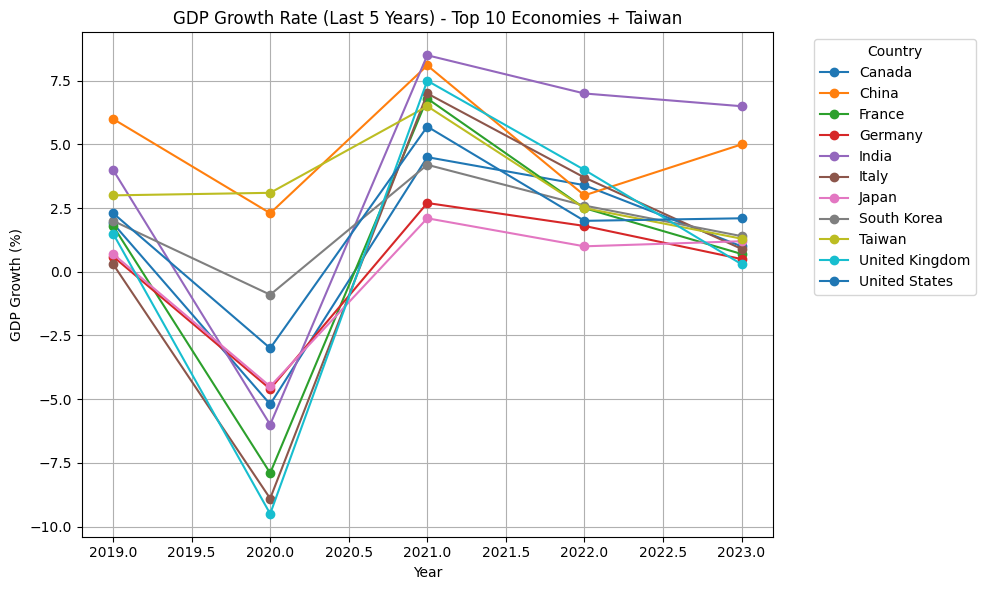

In [5]:
# 畫出各國近五年的 GDP 年增率折線圖（使用基本 list 運算）
plt.figure(figsize=(10, 6))

for country in countries:
    # 針對每個國家，收集它的年份與成長率
    years = [record["year"] for record in data if record["country"] == country]
    growth_rates = [record["gdp_growth"] for record in data if record["country"] == country]

    # 依年份排序（保險起見）
    combined = list(zip(years, growth_rates))
    combined.sort(key=lambda x: x[0])  # 依 year 排序
    sorted_years = [item[0] for item in combined]
    sorted_growth = [item[1] for item in combined]

    plt.plot(sorted_years, sorted_growth, marker="o", label=country)

plt.title("GDP Growth Rate (Last 5 Years) - Top 10 Economies + Taiwan")
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.grid(True)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()